In [2]:
import pandas as pd
import seaborn as sns
import plotly.offline as py
import seaborn as sns
import matplotlib.pyplot as pl

In [3]:
matches=pd.read_csv('WorldCupMatches.csv')
players=pd.read_csv('WorldCupPlayers.csv')
cups=pd.read_csv('WorldCups.csv')

In [4]:
matches.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [6]:
players.head(3)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


In [7]:
cups.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


In [28]:
matches_temp=matches[matches['Year'].notnull()]

In [29]:
matches_temp['Year']=matches_temp['Year'].astype(int)
matches_temp=matches_temp.groupby('Year')['Attendance'].sum().reset_index()

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
matches_temp

,Year,Attendance
0,1930,590549.0
1,1934,363000.0
2,1938,375700.0
3,1950,1045246.0
4,1954,768607.0
5,1958,819810.0
6,1962,893172.0
7,1966,1563135.0
8,1970,1603975.0
9,1974,1865753.0


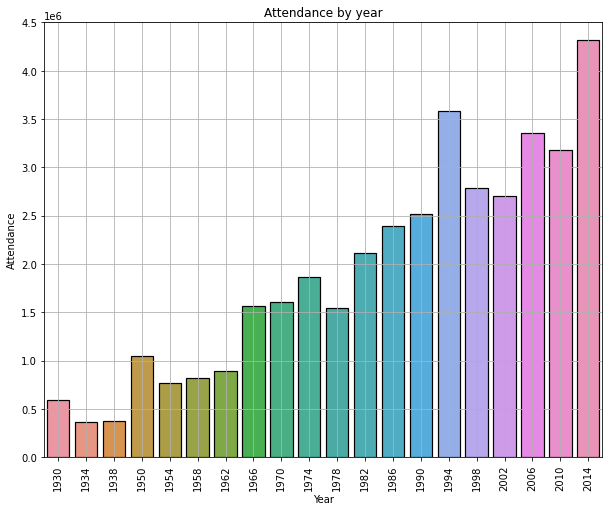

In [54]:
pl.figure(figsize=(10,8))
sns.barplot(matches_temp['Year'],matches_temp['Attendance'],
           linewidth=1.2,edgecolor='k')
pl.xticks(rotation=90)
pl.ylim(0,4500000)
pl.grid()
pl.title('Attendance by year')
pl.show()

2014 had tha maximum attandees followed by 1994

In [55]:
matches_notnull=matches[matches['Year'].notnull()].copy()

In [57]:
matches_temp=matches_notnull.groupby('Year')['Attendance'].mean().reset_index()

In [67]:
matches_temp['Year']=matches_temp['Year'].astype(int)

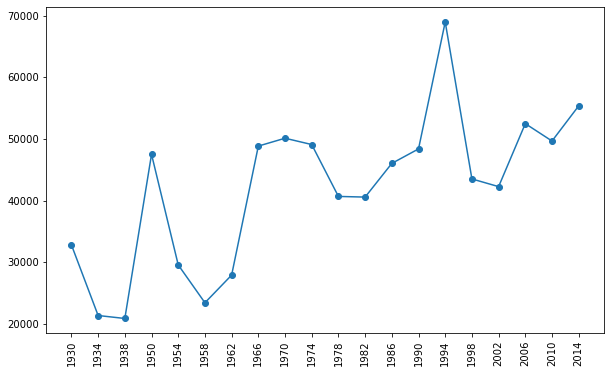

In [75]:
pl.figure(figsize=(10,6))
pl.plot(matches_temp['Attendance'],marker='o')
pl.xticks(range(len(matches_temp)),matches_temp['Year'],rotation=90)
pl.show()

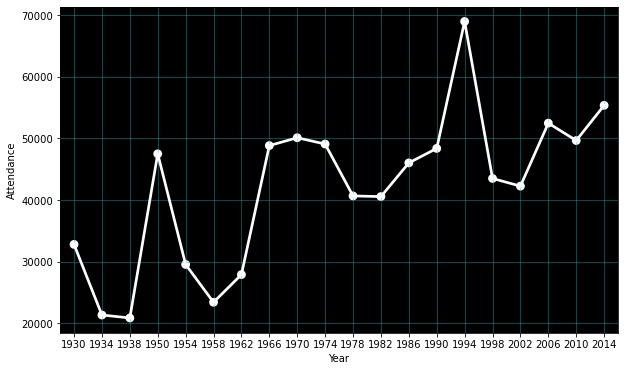

In [83]:
pl.figure(figsize=(10,6))
ax=sns.pointplot(matches_temp['Year'],matches_temp['Attendance'],color='w')
ax.set_facecolor('k')
pl.grid(color='c',alpha=0.5)
pl.show()

In [85]:
cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


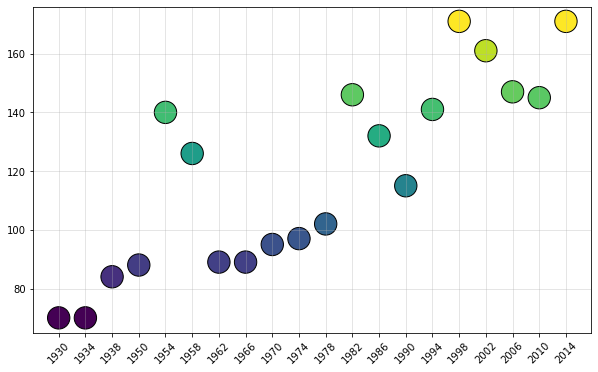

In [132]:
cups_t=cups.copy()
cups_t['Year']=cups_t['Year'].astype(str)
pl.figure(figsize=(10,6))
ax=pl.scatter(data=cups_t,x='Year',y='GoalsScored',c=cups_t['GoalsScored'],s=500,
          edgecolor='k',linewidth=1,)
pl.xticks(cups_t['Year'].unique())
pl.xticks(rotation=45)
pl.grid(alpha=0.4)

In [129]:
cups_t['Year'].unique()

array(['1930', '1934', '1938', '1950', '1954', '1958', '1962', '1966',
       '1970', '1974', '1978', '1982', '1986', '1990', '1994', '1998',
       '2002', '2006', '2010', '2014'], dtype=object)